In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler

In [15]:
df = pd.read_csv('data_set_A.csv')

df.head()



,0,1
0,-1.534076,5.169982
1,1.452231,2.699340
2,0.861024,2.281911
3,1.546562,1.711730
4,3.088828,0.481944


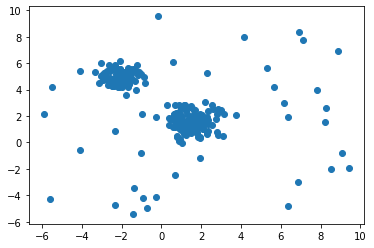

In [16]:
x = df.values

plt.scatter(x[:,0], x[:,1])

# **Modelo de entrenamiento-issolation forest**

In [ ]:
clf = IsolationForest(contamination=.1)
clf.fit(x)
predictions = clf.predict(x)

In [ ]:
(predictions<0).mean()

0.1

In [ ]:
abn_ind = np.where(predictions < 0)

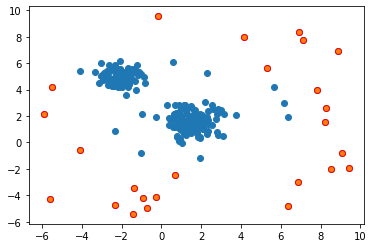

In [ ]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(x[abn_ind,0], x[abn_ind,1], edgecolors="r")

# **datos de series de tiempo**

In [ ]:

df_sen = pd.read_csv('sensors.csv', index_col='time')
df_sen.head()

,sensor1,sensor2,sensor3
time,,,
2020-04-01 00:00:00,0.248380,3.214768,12.313405
2020-04-01 00:01:00,2.258430,1.054156,11.453157
2020-04-01 00:02:00,4.834818,0.284641,10.082687
2020-04-01 00:03:00,5.058023,0.845871,9.870637
2020-04-01 00:04:00,6.888020,-2.019289,9.265985


In [ ]:
df_sen.index = pd.to_datetime(df_sen.index)
type(df_sen.index)

pandas.core.indexes.datetimes.DatetimeIndex

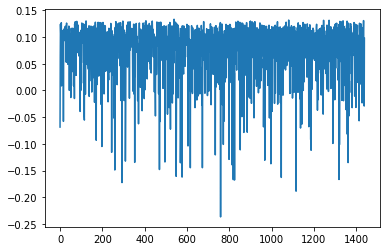

In [ ]:
x = df_sen.values

clf = IsolationForest(contamination=.1)
predictions = clf.fit_predict(x)
dec_fun = clf.decision_function(x)

plt.plot(dec_fun)

In [ ]:
df_sen['health'] = dec_fun
df_sen.head()

,sensor1,sensor2,sensor3,health
time,,,,
2020-04-01 00:00:00,0.248380,3.214768,12.313405,-0.068600
2020-04-01 00:01:00,2.258430,1.054156,11.453157,0.063233
2020-04-01 00:02:00,4.834818,0.284641,10.082687,0.124016
2020-04-01 00:03:00,5.058023,0.845871,9.870637,0.107886
2020-04-01 00:04:00,6.888020,-2.019289,9.265985,0.097637


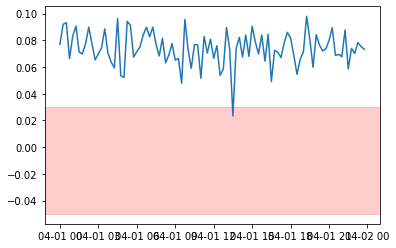

In [ ]:
plt.plot(df_sen['health'].resample('15T').mean())
plt.axhspan(-.05, .03, alpha=0.2, color='red')